In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_MEGNet_5folds = pd.read_csv('../Data/train_MEGNet_5folds.csv')

In [17]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [19]:
train = pd.concat([train,train_MEGNet_5folds],1)

In [26]:
train = train.iloc[:,[0,1,2,3,4,5,7,8]]

In [21]:
train['abs_error'] = np.abs(train.scalar_coupling_constant - train.yhat)

In [27]:
train['count'] = train.groupby(['molecule_name'])['id'].transform('count')

In [31]:
error_type_count = train.groupby(['type','count'])['abs_error'].mean().unstack()
error_type_count_num = train.groupby(['type','count'])['abs_error'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c06eef5f8>,
      dtype=object)

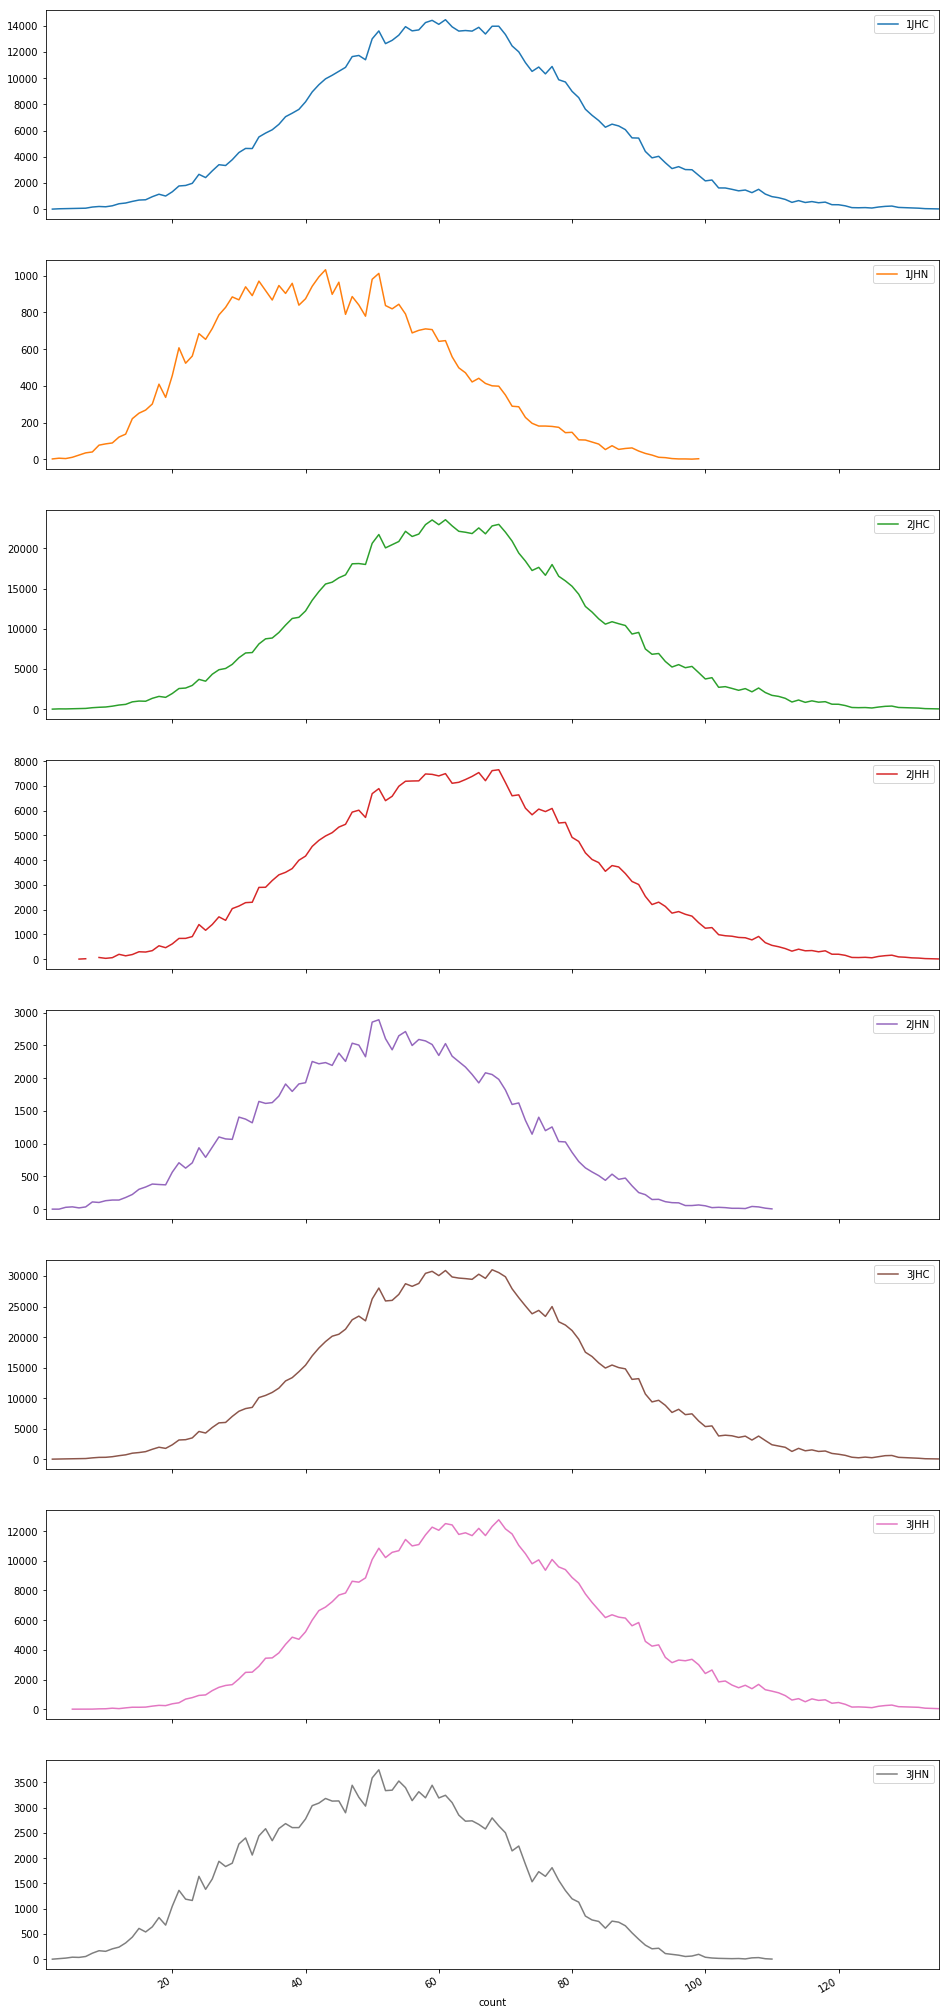

In [42]:
error_type_count_num.T.plot(subplots=True,figsize=(16,40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c0c278e80>,
      dtype=object)

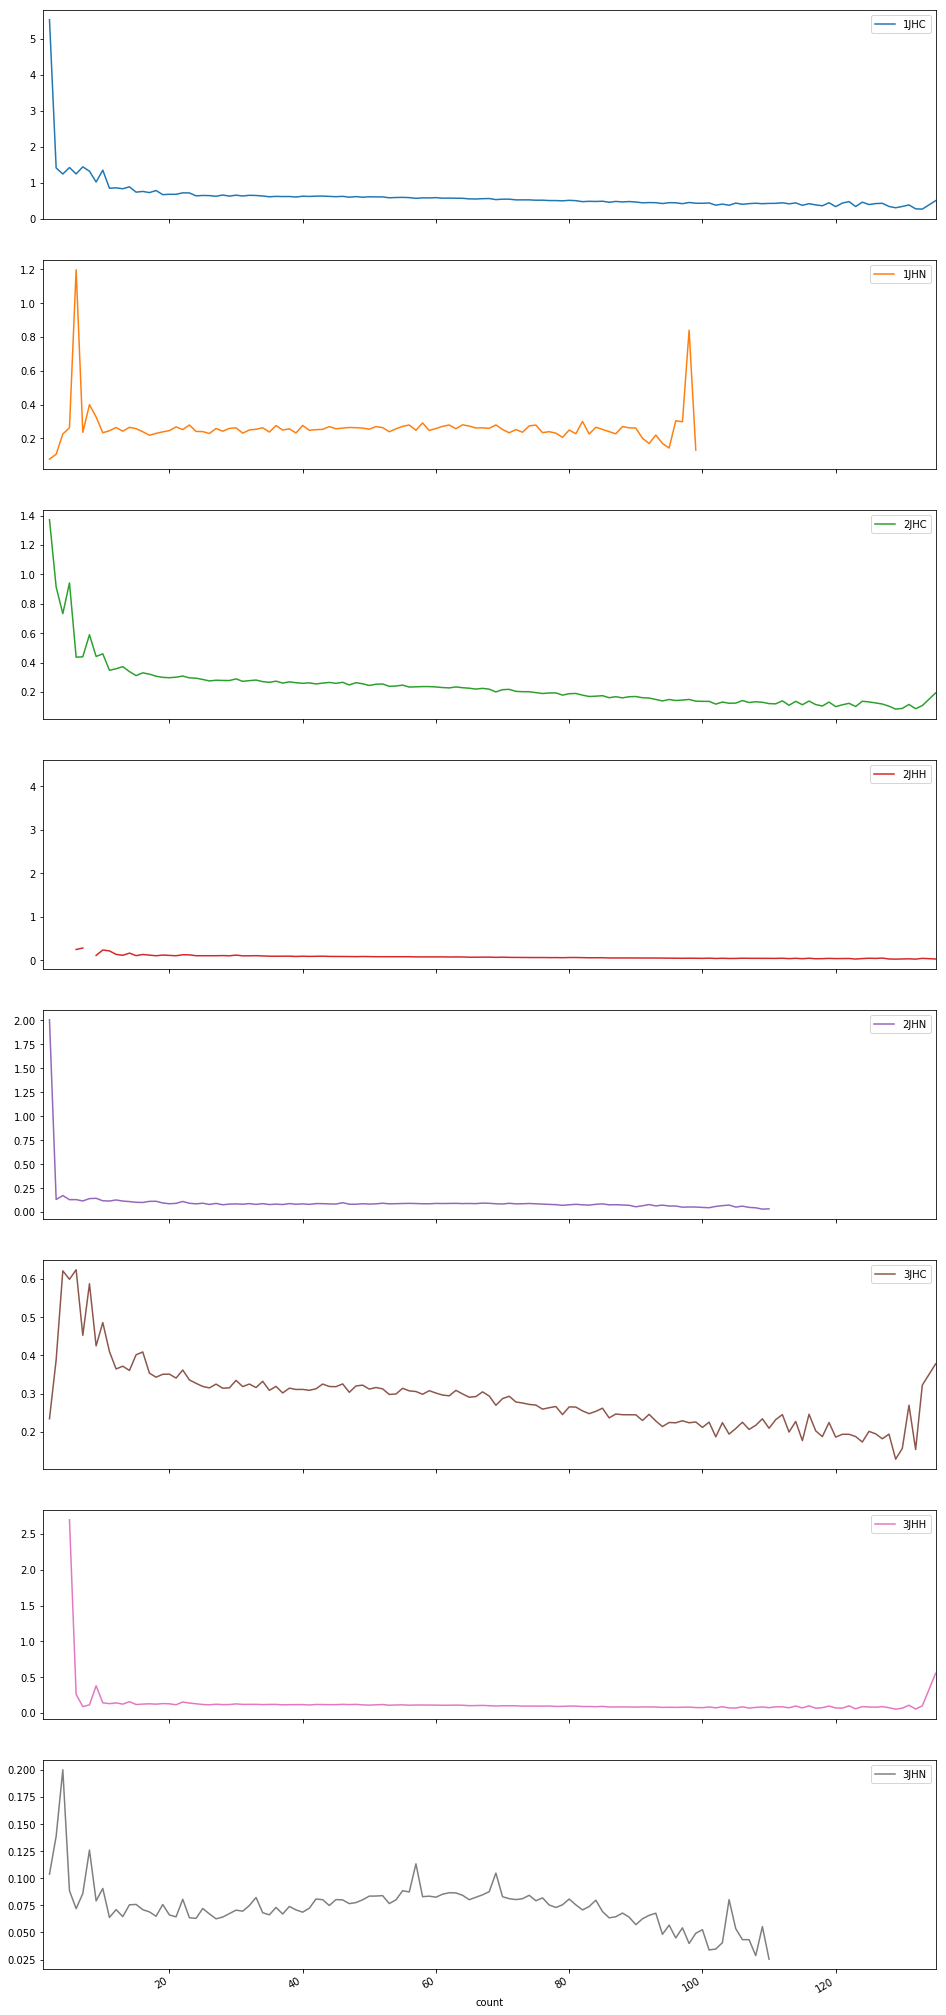

In [39]:
error_type_count.T.plot(subplots=True,figsize=(16,40))

In [44]:
test['count'] = test.groupby(['molecule_name'])['id'].transform('count')

In [46]:
error_type_count_num_test = test.groupby(['type','count'])['id'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c11991780>,
      dtype=object)

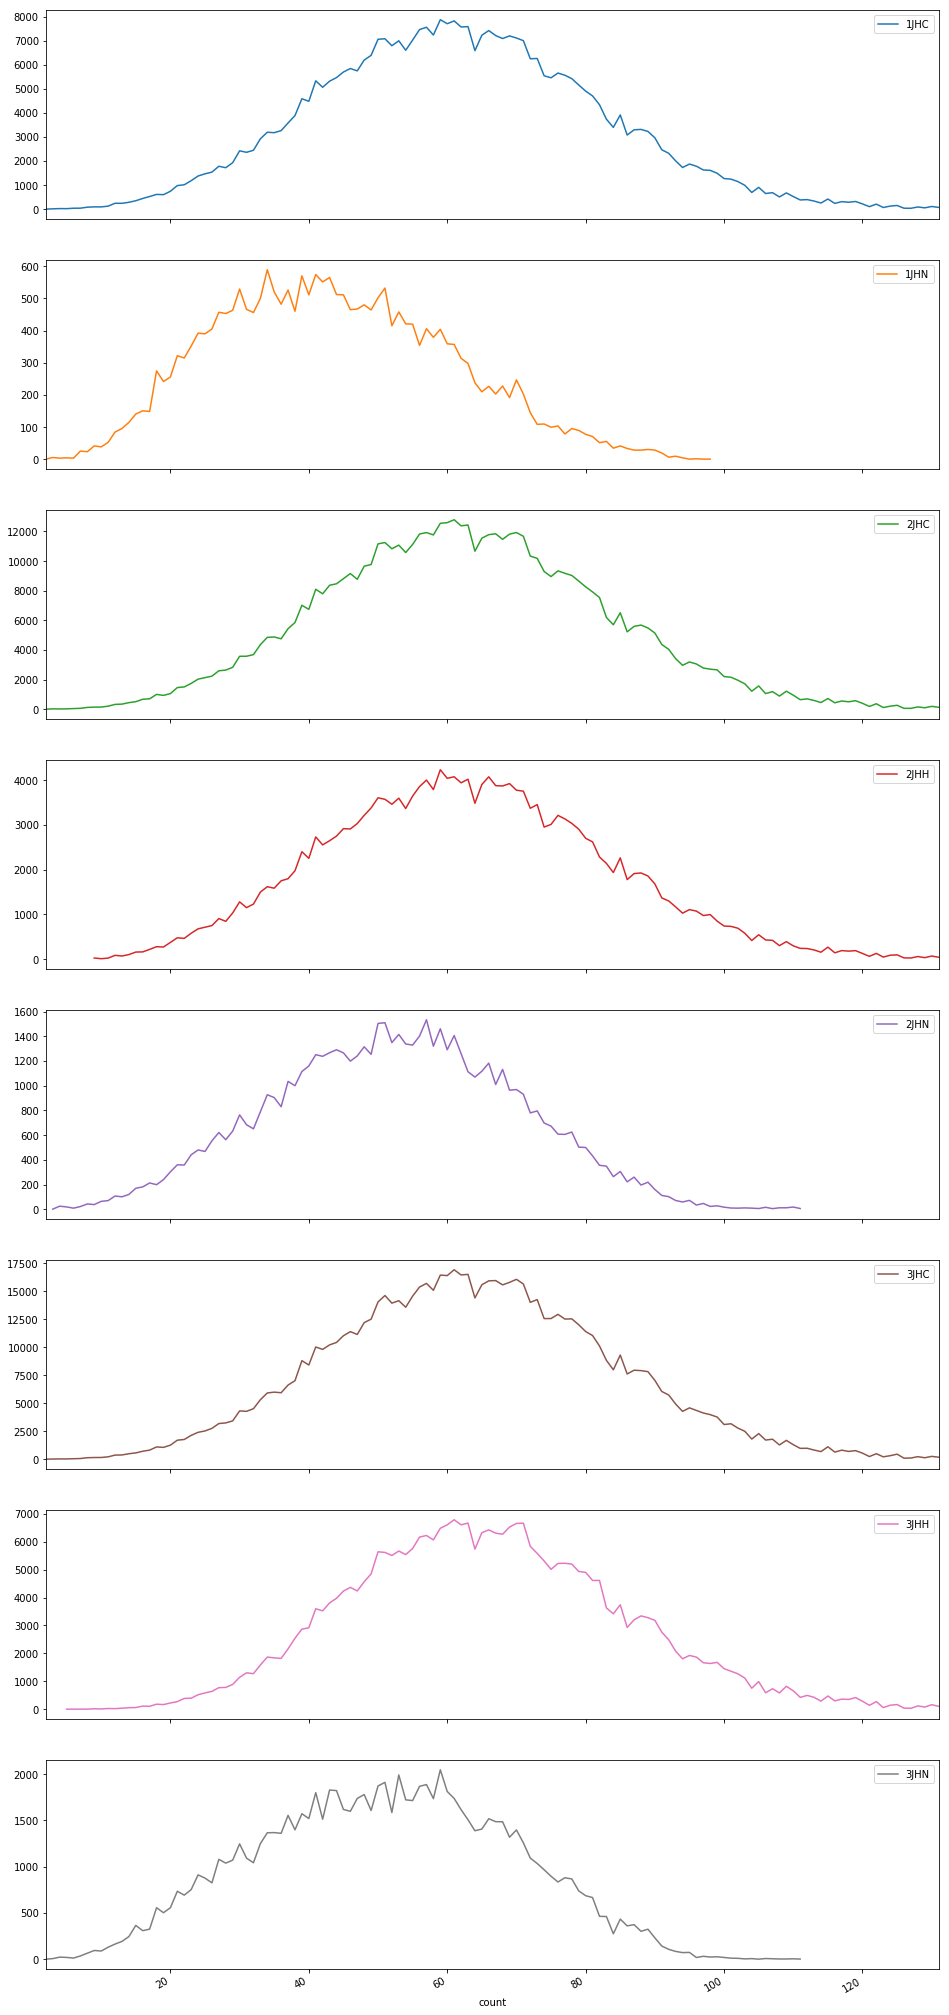

In [47]:
error_type_count_num_test.T.plot(subplots=True,figsize=(16,40))

In [52]:
count_atom = train.groupby(['molecule_name']).apply(lambda x:len(set(x.atom_index_0)|set(x.atom_index_1)))

In [55]:
train['count_atom'] = train.molecule_name.map(count_atom.to_dict())

In [57]:
error_type_count = train.groupby(['type','count_atom'])['abs_error'].mean().unstack()
error_type_count_num = train.groupby(['type','count_atom'])['abs_error'].count().unstack()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c112790f0>,
      dtype=object)

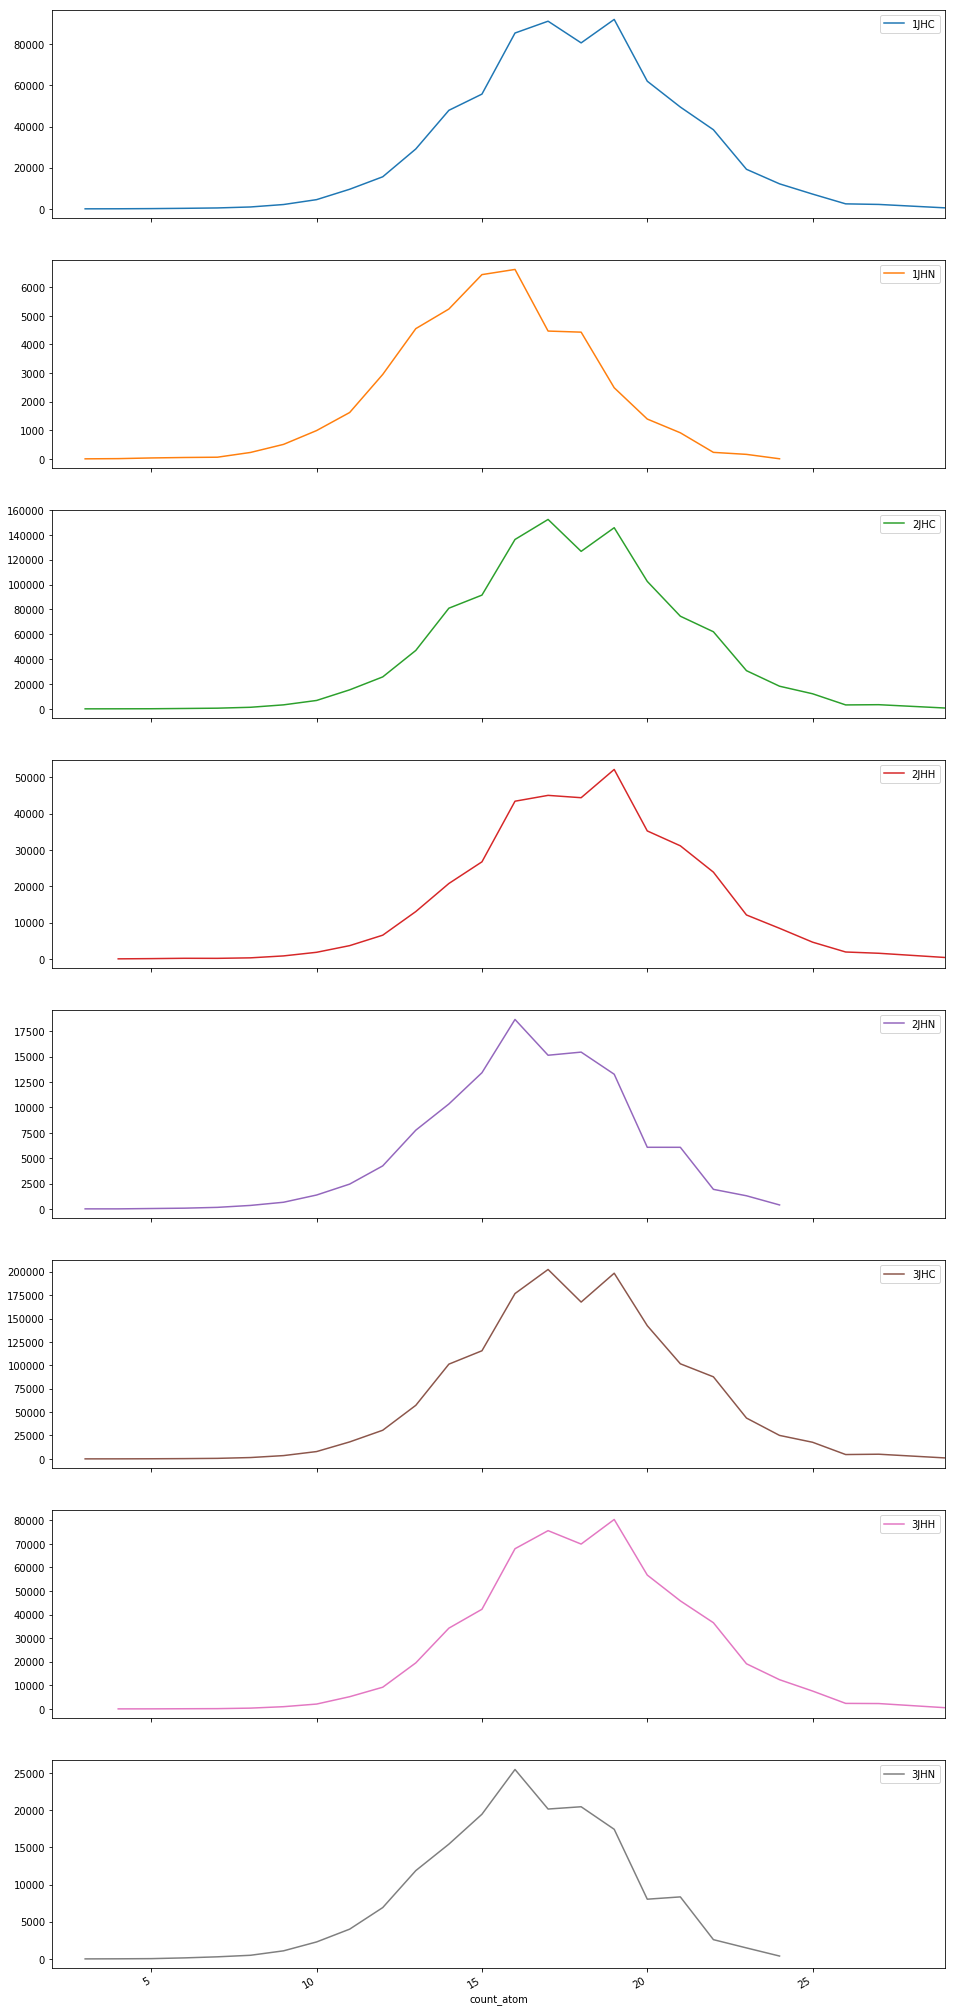

In [58]:
error_type_count_num.T.plot(subplots=True,figsize=(16,40))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c11115cf8>,
      dtype=object)

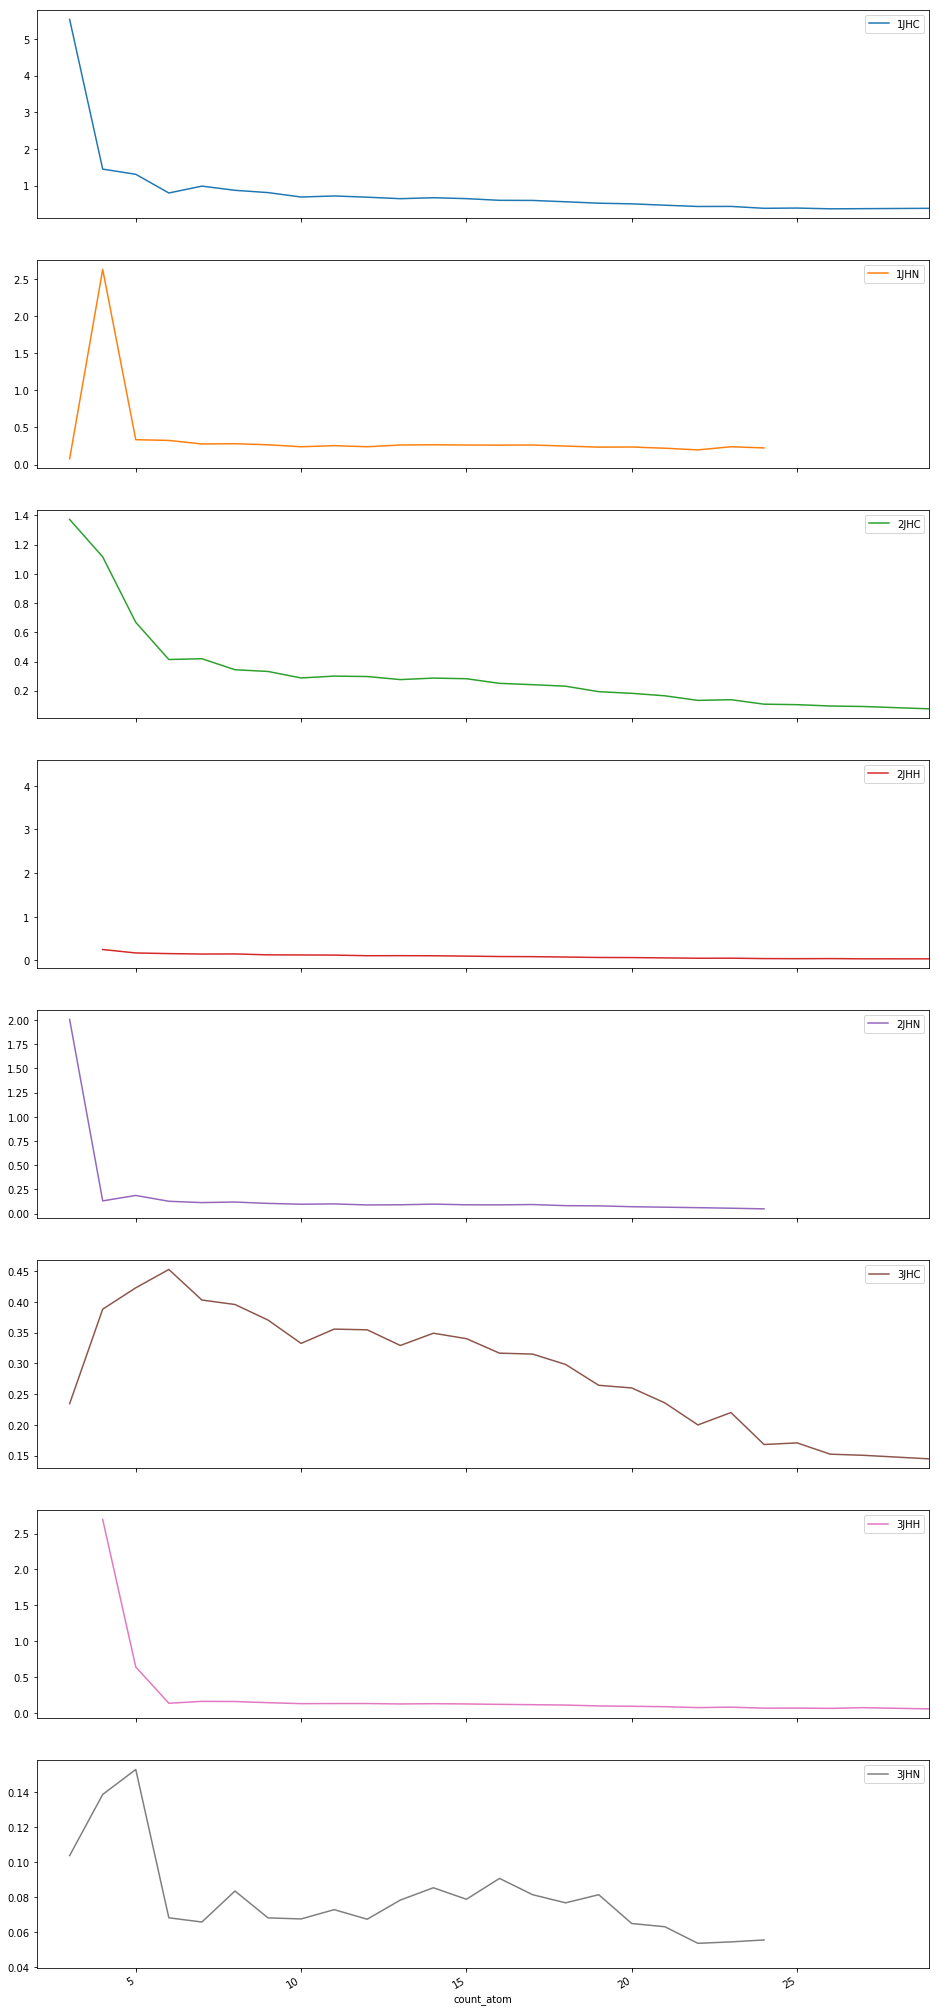

In [59]:
error_type_count.T.plot(subplots=True,figsize=(16,40))